<a href="https://colab.research.google.com/github/shaharbanu-123/FINAL-Project/blob/main/project_26_08_2025_GRU_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Setup & Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# CodeGrade Tag Init1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load and Preprocess the Data**

In [3]:
# Load the csv
csv_loc = "/content/drive/MyDrive/cpcb_dly_aq_west_bengal-2010.csv"
df = pd.read_csv(csv_loc)

# Rename RSPM/PM10 column to PM10
df = df.rename(columns={'RSPM/PM10': 'PM10'})
# Rename Sampling Date to Date
df = df.rename(columns={'Sampling Date' : ' Date'})

df.head()



,Stn Code,Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,PM10,SPM
0,386,1/1/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.0,80.1,252.000000,525.0
1,386,1/3/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,10.6,84.1,248.000000,516.0
2,386,1/8/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.8,85.2,253.666667,527.0
3,386,1/12/2010,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.2,77.6,255.333333,521.0
4,386,14-01-10,West Bengal,Asansol,"Asansol Municipal Corporation, Asansol",West Bengal State Pollution Control Board,Industrial Area,9.7,84.8,241.666667,511.0


In [4]:
# Parse date column and sort
df[' Date'] = pd.to_datetime(df[' Date'], format='mixed', dayfirst=True, errors='coerce')

df = df.sort_values(' Date')

# Filter PM2.5 values for a selected location
city_df = df[df['City/Town/Village/Area'] == 'Kolkata'][[' Date', 'PM10']].dropna()

# Resample daily average if needed
city_df = city_df.set_index( ' Date').resample('D').mean()

df.head()
city_df.head()

,PM10
Date,
2010-01-01,155.000000
2010-01-02,193.833333
2010-01-03,133.000000
2010-01-04,76.333333
2010-01-05,30.666667


# **3.Heat Map for Daily PM10 Levels in Kolkata**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Extract month for grouping
df['Day'] = df[' Date'].dt.day
df['Month'] = df[' Date'].dt.strftime('%b')
df['Month_Num'] = df[' Date'].dt.month  # to sort months later


In [6]:
# Group by month and day, then get average PM10
pivot_df = df.groupby(['Month_Num', 'Month', 'Day'])['PM10'].mean().reset_index()

# Pivot table: rows = day, columns = month
heatmap_data = pivot_df.pivot(index='Day', columns='Month', values='PM10')

# Sort months in calendar order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data = heatmap_data[month_order]


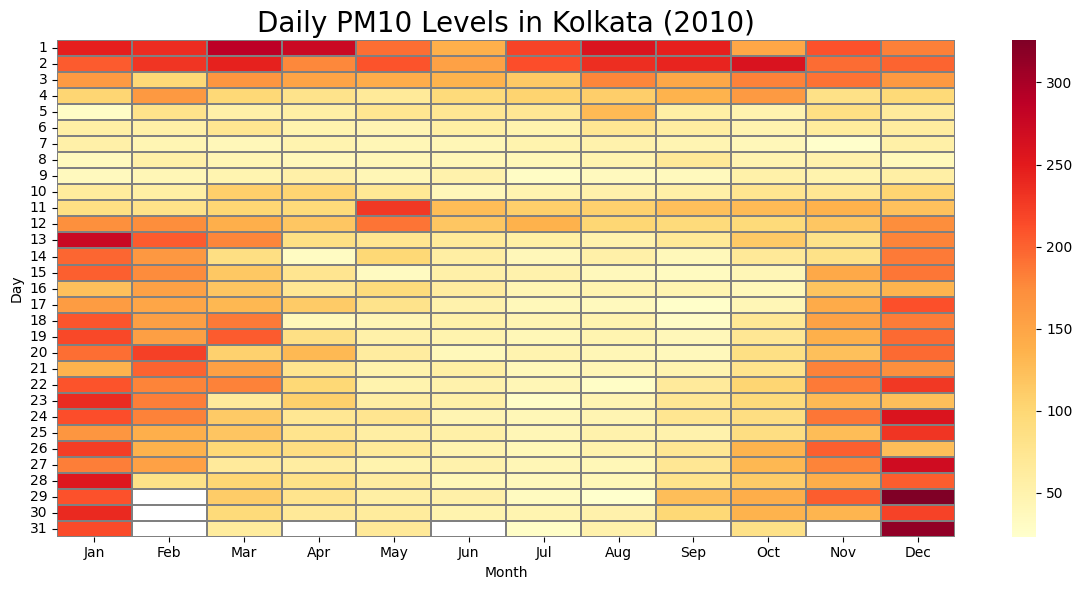

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3, linecolor='gray', annot=False)
plt.title('Daily PM10 Levels in Kolkata (2010)', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Day')
plt.tight_layout()
plt.show()



# **4.GRU Forecasting**

## **1.Scale Data**

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Scaling PM10 values
scaler = MinMaxScaler()
city_df['PM10_scaled'] = scaler.fit_transform(city_df[['PM10']])

## **2.Create sequences**

In [9]:
# Creating Sequences for Supervised Learning
def create_sequences(data, lookback=30):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

import numpy as np
pm10_values = city_df['PM10_scaled'].values
X, y = create_sequences(pm10_values, lookback=30)

## **3.Train-test split**

In [10]:
# Split into Train-Test (e.g., 80-20 split)
split = -50
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}')

Training samples: 285 | Test samples: 50


## **4. GRU Forcasting**

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0497 - val_loss: 0.0489
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0345 - val_loss: 0.0823
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0304 - val_loss: 0.0722
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0268 - val_loss: 0.0554
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0279 - val_loss: 0.0576
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0242 - val_loss: 0.0563
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0216 - val_loss: 0.0534
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0238 - val_loss: 0.0555
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0244 - val_loss: 0.0583
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0188 - val_loss: 0.0513
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0210 - val_loss: 0.0496
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0208 - val_loss: 0.0549
Epoch 13/50

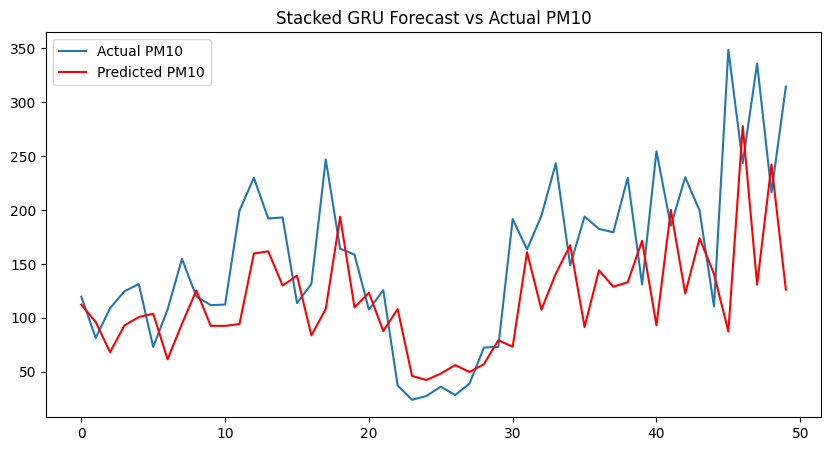

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reshape input for GRU: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#GRU-Model building
model_gru = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(32),
    Dropout(0.2),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse')

history = model_gru.fit(X_train, y_train,
                        epochs=50, batch_size=32,
                        validation_data=(X_test, y_test),
                        verbose=1)

# Predictions
pred_gru = model_gru.predict(X_test).flatten()

# Inverse transform
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
y_pred_actual = scaler.inverse_transform(pred_gru.reshape(-1,1)).flatten()

# Plot
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual PM10')
plt.plot(y_pred_actual, label='Predicted PM10', color='red')
plt.legend()
plt.title('Stacked GRU Forecast vs Actual PM10')
plt.show()


## **5. Function to evaluate models**

In [13]:
def evaluate_forecast(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mape = (np.abs((y_true - y_pred) / y_true)).mean() * 100
    r2 = r2_score(y_true, y_pred)
    accuracy = 100 - mape

    print('--- Evaluation Metrics ---')
    print(f'MAE    : {mae:.3f}')
    print(f'MSE    : {mse:.3f}')
    print(f'RMSE   : {rmse:.3f}')
    print(f'MAPE   : {mape:.3f}%')
    print(f'R²     : {r2:.3f}')
    print(f'Forecasting Accuracy : {accuracy:.3f}%')

    return mae, mse, rmse, mape, r2, accuracy


## **6.Residual Plotting**

In [14]:
#Plot Residual
def plot_residuals(true, pred, label='Model'):
    residuals = true.flatten() - pred.flatten()
    plt.figure(figsize=(10, 4))
    plt.plot(residuals, label=f'{label} Residuals')
    plt.axhline(0, linestyle='--', color='black')
    plt.title(f'Residual Plot - {label}')
    plt.legend()
    plt.show()

## **7.Evatuation Metrics**

--- Evaluation Metrics ---
MAE    : 47.860
MSE    : 4488.697
RMSE   : 66.998
MAPE   : 31.956%
R²     : 0.253
Forecasting Accuracy : 68.044%


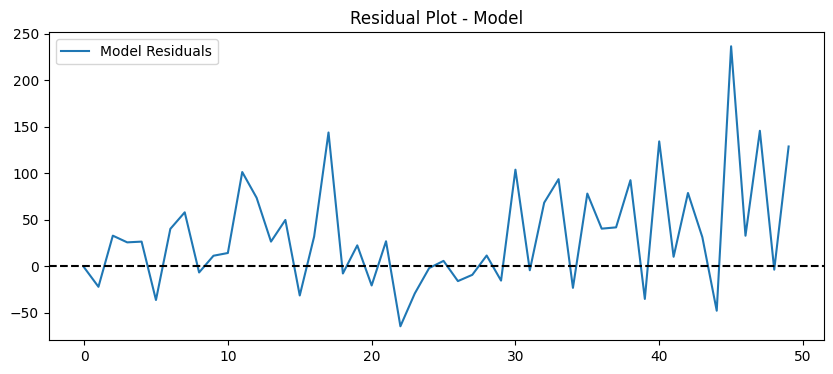

In [15]:
# Evaluate GRU
gru_mae, gru_mse, gru_rmse, gru_mape, gru_r2, gru_accuracy = evaluate_forecast(y_test_actual, y_pred_actual)
plot_residuals(y_test_actual, y_pred_actual)

## **8.Accuracy Table**

In [17]:
# Metrics and Accuracy table

import pandas as pd

metrics_df = pd.DataFrame({
    'Model': ['GRU'],
    'RMSE': [ gru_rmse],
    'MAE': [ gru_mae],
    'MAPE (%)': [ gru_mape],
    'R²': [gru_r2],
    'Forecast Accuracy (%)': [gru_accuracy]
    })

metrics_df.set_index('Model', inplace=True)
metrics_df.style.background_gradient(cmap='Accent').format("{:.2f}")


,RMSE,MAE,MAPE (%),R²,Forecast Accuracy (%)
Model,,,,,
GRU,67.00,47.86,31.96,0.25,68.04
